In [24]:
import numpy as np
import tensorflow as tf

In [25]:
file = open('trainNN.txt')

lines = file.readlines()

X = []
labels = []


for line in lines:
    var = [float(x) for x in line.split()]
    
    X.append(var[:-1])
    labels.append(int(var[-1]))

In [26]:
number_of_classes = max(labels)
N = len(X)

Y = np.zeros((N,number_of_classes))

for i in range(N):
    Y[i,labels[i]-1] = 1

In [27]:
X = np.array(X)
Y = np.array(Y)

In [28]:
# building the model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4,input_shape=(X.shape[1],),activation='sigmoid'))
model.add(tf.keras.layers.Dense(Y.shape[1],activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='mse')
model.summary()

model.get_weights()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


[array([[-0.34838933,  0.0788976 , -0.29942673, -0.7175921 ],
        [-0.62518436, -0.0767343 , -0.6611854 , -0.14127308],
        [-0.14836663,  0.1924122 , -0.8559361 ,  0.7278212 ],
        [ 0.5137188 , -0.19702983,  0.7313816 , -0.24275386]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.08202815,  0.27288932, -0.5655869 ,  0.7232987 ],
        [ 0.6091226 , -0.5199094 , -0.28178513,  0.35883993],
        [-0.4642877 , -0.12687695, -0.19708437, -0.00406533],
        [ 0.41841298, -0.5402562 ,  0.10778964,  0.7496149 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32)]

In [29]:
r = model.fit(X,Y,epochs=100,)

Train on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 406us/sample - loss: 0.2399
Epoch 2/100
500/500 [==============================] - 0s 61us/sample - loss: 0.2206
Epoch 3/100
500/500 [==============================] - 0s 52us/sample - loss: 0.2064
Epoch 4/100
500/500 [==============================] - 0s 59us/sample - loss: 0.1960
Epoch 5/100
500/500 [==============================] - 0s 52us/sample - loss: 0.1886
Epoch 6/100
500/500 [==============================] - 0s 50us/sample - loss: 0.1828
Epoch 7/100
500/500 [==============================] - 0s 52us/sample - loss: 0.1773
Epoch 8/100
500/500 [==============================] - 0s 48us/sample - loss: 0.1726
Epoch 9/100
500/500 [==============================] - 0s 43us/sample - loss: 0.1679
Epoch 10/100
500/500 [==============================] - 0s 53us/sample - loss: 0.1639
Epoch 11/100
500/500 [==============================] - 0s 48us/sample - loss: 0.1590
Epoch 12/100
500/500 [===================

500/500 [==============================] - 0s 47us/sample - loss: 0.0450
Epoch 97/100
500/500 [==============================] - 0s 46us/sample - loss: 0.0441
Epoch 98/100
500/500 [==============================] - 0s 45us/sample - loss: 0.0434
Epoch 99/100
500/500 [==============================] - 0s 38us/sample - loss: 0.0419
Epoch 100/100
500/500 [==============================] - 0s 38us/sample - loss: 0.0411


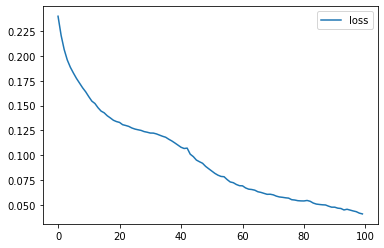

In [30]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.legend()

In [31]:
model.predict(X)

array([[9.3646020e-01, 1.0560928e-01, 1.1963005e-04, 1.7621756e-05],
       [5.2837882e-02, 8.2353562e-01, 2.9197836e-01, 6.4231775e-04],
       [1.1759835e-02, 2.4331000e-02, 4.0989196e-01, 8.2447779e-01],
       ...,
       [9.4441146e-01, 9.5401548e-02, 9.6683711e-05, 1.6475142e-05],
       [5.9007831e-02, 8.0170429e-01, 2.5443876e-01, 6.4777012e-04],
       [1.1729833e-02, 2.3528371e-02, 4.0838400e-01, 8.3121234e-01]],
      dtype=float32)

In [32]:
model.get_weights()

[array([[-0.469443  ,  0.01183682, -0.37523025, -0.39046016],
        [-0.74610245, -0.07528108, -0.7575365 , -0.21736628],
        [-0.26974756,  0.06445478, -0.9671383 ,  0.36398265],
        [ 0.39282447, -0.14446548,  0.6067048 , -0.23090996]],
       dtype=float32),
 array([-0.12159605,  7.4670897 , -0.01376561,  7.260863  ], dtype=float32),
 array([[  0.14706337,   0.02098059,  -0.7046495 ,   0.5866562 ],
        [  0.5118558 ,   7.1088705 ,   1.3195662 ,  -9.741928  ],
        [ -0.34482712,  -0.2355689 ,  -0.28577775,  -0.09974918],
        [  7.103707  ,  -5.578674  , -10.623959  ,  -3.4502428 ]],
       dtype=float32),
 array([-4.4525404 , -3.9840872 , -0.41845465,  1.948456  ], dtype=float32)]